In [5]:
from cluster_half_shelfs_alpha import Half_shelf_cluster
import numpy as np
import cv2 as cv
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from matplotlib import pyplot as plt
from cake import cake
from low_pass import LowPass
from confectionery import Confectionery

In [6]:
frame_number=20
normalized_cut_off_frequency=8.0
cut_portion=0.95
koppenrath=Confectionery()
object_trajectory=my_data = np.genfromtxt('/Users/Hoang_1/Desktop/Master_Arbeit/software/janus_particle_tracking/object_0_trajectory.csv', delimiter=',')
object_trajectory=object_trajectory[1:,:]
start_frame=round(object_trajectory[0,0])
end_frame=round(object_trajectory[-1,0])
stream_string=[]
for i in range(start_frame,end_frame+1):
    im_path="Image_Data/Aufnahmen_JPEG_06_07_take_2/Hoang_07_06_2023_Aufnahmen_Rollen_Partikel_Rollen_12_mu_200_002_t"+str(i).zfill(3)+".jpg"
    stream_string.append(im_path)
obj_image_current=cv.imread(stream_string[frame_number], cv.IMREAD_GRAYSCALE)   
circle=object_trajectory[frame_number,:] 
y_pos=object_trajectory[frame_number,2]
x_pos=object_trajectory[frame_number,1]
radius=np.floor(object_trajectory[frame_number,3])
object_indeces=np.s_[round(y_pos-radius):round(y_pos+radius)+1,
                    round(x_pos-radius):round(x_pos+radius)+1]
obj_image_current=obj_image_current[object_indeces]
lp=LowPass(confectionery=koppenrath,normalized_cut_off_frequency=normalized_cut_off_frequency, cut_portion=1.0)
obj_image_filtered=lp.current_filter(obj_image_current).astype(np.uint8)
edges = cv.Canny(image=obj_image_filtered, threshold1=10, threshold2=20) 


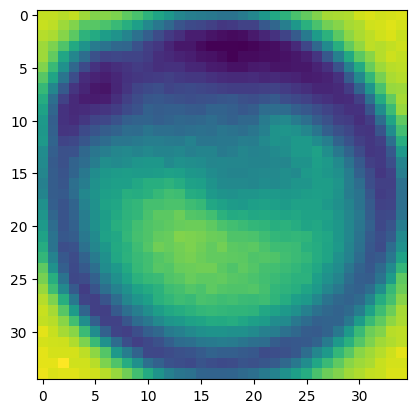

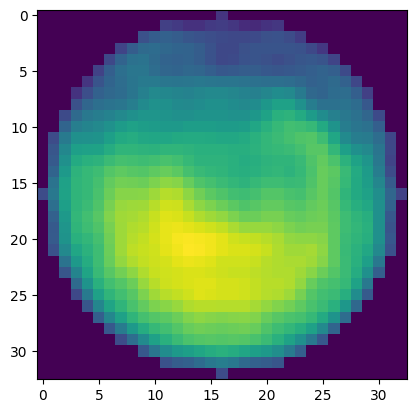

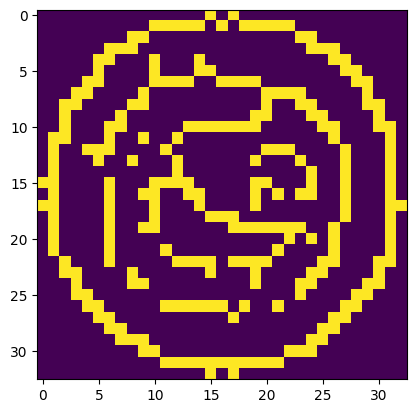

In [7]:
plt.figure()
plt.imshow(obj_image_current)
plt.figure()
plt.imshow(obj_image_filtered)
plt.figure()
plt.imshow(edges)
plt.show()

In [8]:
0.95*18

17.099999999999998